# Depandancies

In [88]:
import numpy as np
import pandas as pd
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
# from Graph import Graph
# from Weighted_Graph import Weighted_Graph
import random
from IPython.display import Image
import sqlite3
from networkx.algorithms import community
from ipywidgets import interact
import ipywidgets as widgets
# sqlite_server=r'C:\Users\Crystal\Desktop\Programs\dataset_repo\emr_database.db'
# global sqlite_server
# %matplotlib notebook
from IPython.display import clear_output
from graphviz import Digraph
import graphviz
import pydot
import os
import sys
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# Functions

In [89]:
def degree_central(G):
    c_degree=nx.degree_centrality(G)
    c_degree=list(c_degree.values())
    
    return c_degree

In [90]:
def plot_subgraph(x):
   
    H=G.subgraph(x)
#     list(H)
    edge_label = nx.get_edge_attributes(H, 'Verify')
    pos=nx.kamada_kawai_layout(H,scale=8)
    pos=nx.spring_layout(H)
#     pos=nx.planar_layout(H)
#     pos=nx.circular_layout(H)
    print(list(edge_label))
    fig=plt.figure(figsize=(18,15))
    cmap=plt.get_cmap('inferno')
    nx.draw(G=H,cmap=cmap,node_color=degree_central(H),pos=pos,with_labels=True,edge_labels=True,node_size=500,alpha=0.8,width=2)
    
    nx.draw_networkx_edge_labels(G=H, pos=pos, edge_labels=edge_label, label_pos=0.5, font_size=12, font_color='k', font_family='sans-serif',font_weight='normal', alpha=1.0, rotate=True)
    nx.draw_networkx_edges(G=H, pos=pos,edgelist=None,arrowsize=30)
    
    nice_visual(edge_label.keys(),flow='fwd')
    subgraph_reversed(H)
    

In [91]:
def top_level(top):
    top=top
    node_path=list(G.successors(top))+[top]
#     print(list(H.edges()))
    plot_subgraph(node_path)

In [92]:
def rca_path(x,y):
    all_paths=list(nx.all_simple_paths(G, source=x, target=y, cutoff=None))

    print(all_paths,'\n')

    path_nodes=[]
    for i,p in enumerate(all_paths):
        for b in range(len(all_paths[i])):
            path_nodes.append(all_paths[i][b])

    print(path_nodes)

    plot_subgraph(path_nodes)

In [93]:
def subgraph_reversed(rv):
    
    H=nx.reverse_view(rv)
    edge_label = nx.get_edge_attributes(H, 'Verify')
    pos=nx.kamada_kawai_layout(H,scale=8)
    pos=nx.spring_layout(H,k=20)
#     pos=nx.planar_layout(H)
#     pos=nx.circular_layout(H)
#     pos=nx.spectral_layout(H,scale=15)
    print(list(edge_label))
    fig=plt.figure(figsize=(18,15))
    cmap=plt.get_cmap('inferno')
    nx.draw(G=H,cmap=cmap,node_color=degree_central(H),pos=pos,with_labels=True,edge_labels=True,node_size=500,alpha=0.8,width=2)
    
    nx.draw_networkx_edge_labels(G=H, pos=pos, edge_labels=edge_label, label_pos=0.5, font_size=12, font_color='k', font_family='sans-serif',font_weight='normal', alpha=1.0, rotate=True)
    nx.draw_networkx_edges(G=H, pos=pos,edgelist=None,arrowsize=30,edge_color='r')
    
    plt.savefig('subg_rev.pdf', dpi=None, facecolor='w', edgecolor='w',
          orientation='landscape', papertype=None, format=None,
          transparent=False, bbox_inches=None, pad_inches=0.1,
          frameon=None)
    
    nice_visual(edge_label.keys(),flow='rev')

In [94]:
def nice_visual(x,flow):
     
    d=graphviz.Digraph()
    #     d=pydot.Dot(graph_type='digraph')
    print(x)
    d.attr('node', shape='box')
    d.attr(rankdir='LR')
    d.edges(x)
#     d.edge_attr
    

    # d.render('jim')

    d.view(f'C:\\Users\\96015\\Desktop\\Programming\\Off_Project_Folders\\rca_pdfs\\jim-{flow}-{view}')
    
    


In [ ]:
def nice_visual(x,flow):
    
    if (view!='BFS-FWD'):
        
        d=graphviz.Digraph()
    #     d=pydot.Dot(graph_type='digraph')
        print(x)
        d.edges(x)
        d.edge_attr

        # d.render('jim')

        d.view(f'C:\\Users\\96015\\Desktop\\Programming\\Off_Project_Folders\\rca_pdfs\\jim-{flow}-{view}')
    
    else:
        p=df1[df1['source']=='SV-2 LN2  FC']
        d=graphviz.Digraph(comment='SV-2 LN2  FC')
        my_select='Verify'
        for i in range(len(p)):
            print(str(p.source.iloc[i]))
            d.edge(str(p.source.iloc[i]),str(p.target.iloc[i]),label=str(p[my_select].iloc[i]))
        d.view(f'C:\\Users\\96015\\Desktop\\Programming\\Off_Project_Folders\\rca_pdfs\\jim-{flow}-{view}')


# Access RCA Data

In [95]:
global df1
df1=pd.read_excel('rca_data_1.xlsx', sheet_name='Sheet1',nrows=None)

In [96]:
df1.head()

,source,target,Verify,Condition
0,blower motor no start,M1-AC fail open,check motor contactor,NaN
1,exceed motor FLA,bad bearings,check motor bearings,NaN
2,exceed motor FLA,binding in blower section,check for obstruction,NaN
3,F4 Output 1A FO,loose circuit board,check for loose board,NaN
4,F4 Output 1A FO,Incorrect F4 Profile,check F4 Program,NaN


In [97]:
# df1=df1[0:15]
df1;

# Graph Data 

## Generate Edge List

In [ ]:
d={}
for i in range(len(df1)):
    m=(df1.source.iloc[i],df1.target.iloc[i])
    d[m]=df1['Verify'].iloc[i]
    
d

In [98]:
e = zip(df1.source,df1.target)
e=list(e)
e;

In [ ]:
 edge_labels = {(edge[0], edge[1]): edge[2]['object'] for edge in self.graph.edges(data=True)}

In [ ]:
edge_labels=dict([((u, v,), d['name']) for u, v, d in G.edges(data=True)]))

## Initialize Graph

In [99]:
global G
G = nx.DiGraph()

G.add_edges_from(e)
# G.add_edges_from(e,label=list(df1.Verify))

list(G);

In [ ]:
G.get_edge_data('No Heat','HTR Fuse/Breaker Trip')

In [ ]:
source='source'
target='target'
edge_attribute=['Verify']
G=nx.from_pandas_edgelist(df=df1,source=source, target=target, edge_attr=edge_attribute)
G.to_directed(as_view=True)
G=nx.from_pandas_adjacency()

In [100]:

for i,m in enumerate(e):
    G[e[i][0]][e[i][1]]['Verify']=df1['Verify'].iloc[i]
    

In [101]:
G.get_edge_data('TCU Failed Heating','HTR Fuse/Breaker Trip')

{'Verify': 'check fuses'}

In [102]:
G['TCU Failed Cooling']['SV-1 LN2  FC']

{'Verify': 'verify SV-1 function'}

# Plot Graph

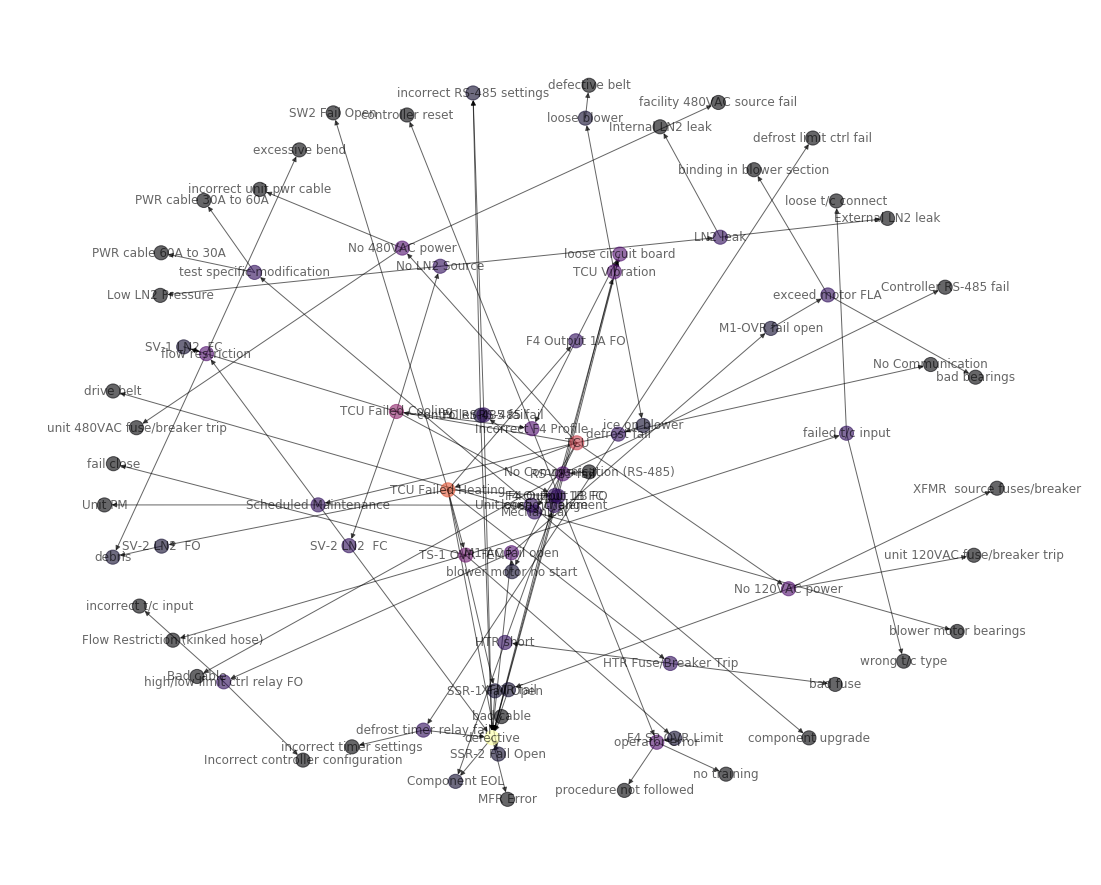

In [103]:
fig=plt.figure(figsize=(15,12))
cmap=plt.get_cmap('inferno')
# pos = nx.kamada_kawai_layout(G)
# pos = nx.spectral_layout(G)
# pos=nx.planar_layout(G)
pos=None
# nx.draw_spring(G,cmap=cmap,node_color=c_degree,with_labels=True,edge_labels=True,node_size=200,alpha=0.7)
nx.draw(G,cmap=cmap,pos=pos,node_color=degree_central(G),with_labels=True,edge_labels=True,node_size=200,alpha=0.6)
plt.show();

## Top Level View

[('SV-2 LN2  FC', 'flow restriction'), ('SV-2 LN2  FC', 'defective')]
dict_keys([('SV-2 LN2  FC', 'flow restriction'), ('SV-2 LN2  FC', 'defective')])
[('defective', 'SV-2 LN2  FC'), ('flow restriction', 'SV-2 LN2  FC')]
dict_keys([('defective', 'SV-2 LN2  FC'), ('flow restriction', 'SV-2 LN2  FC')])


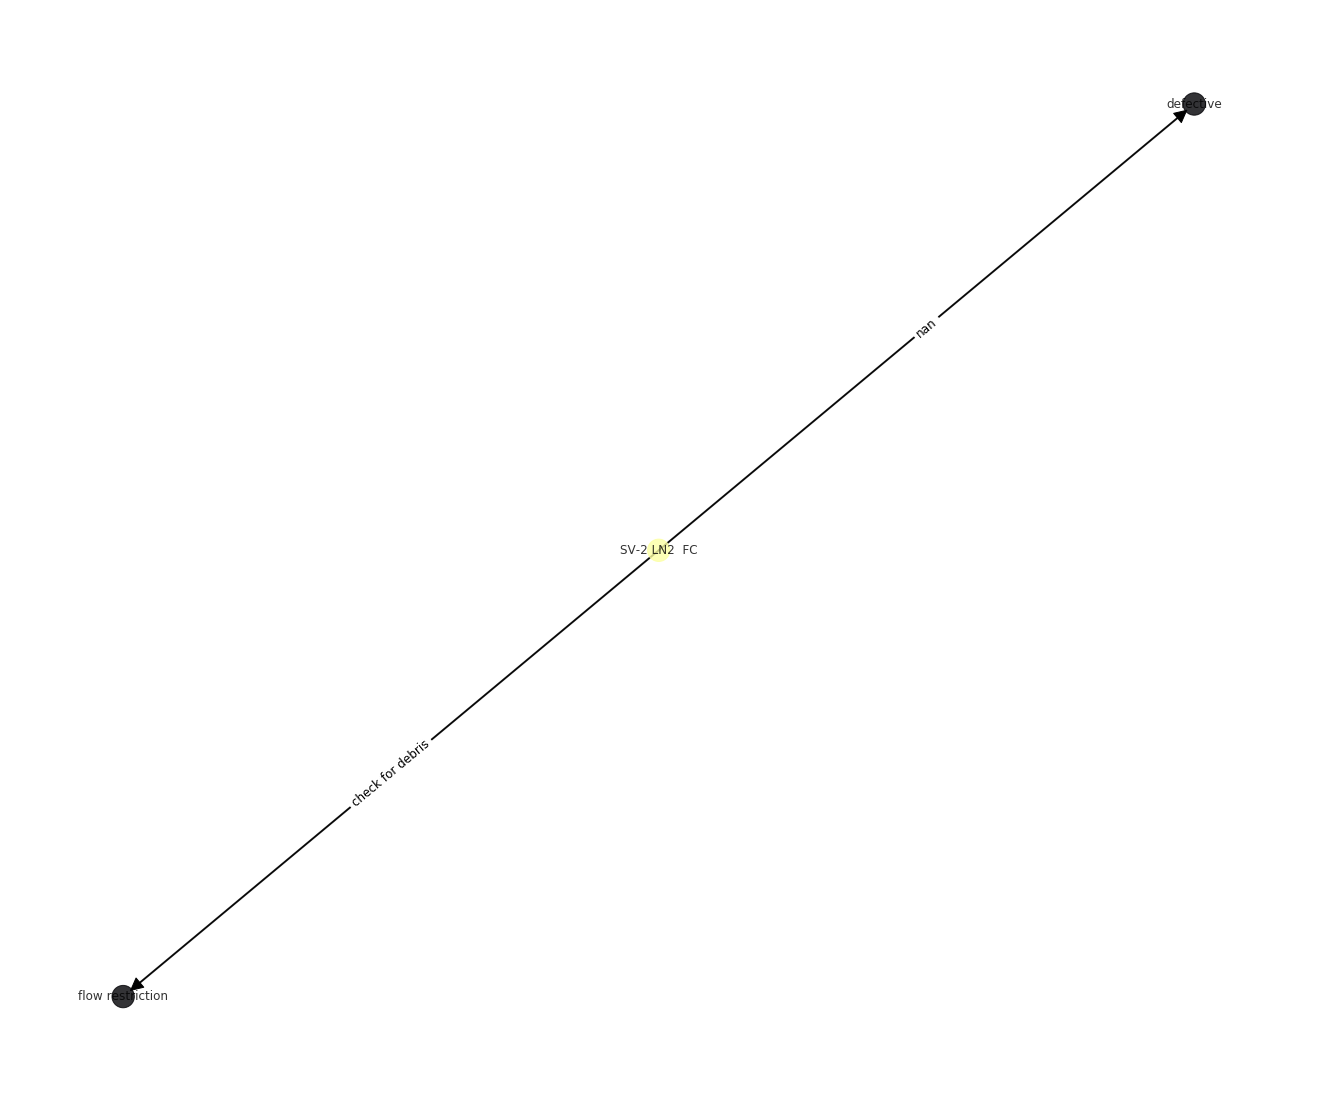

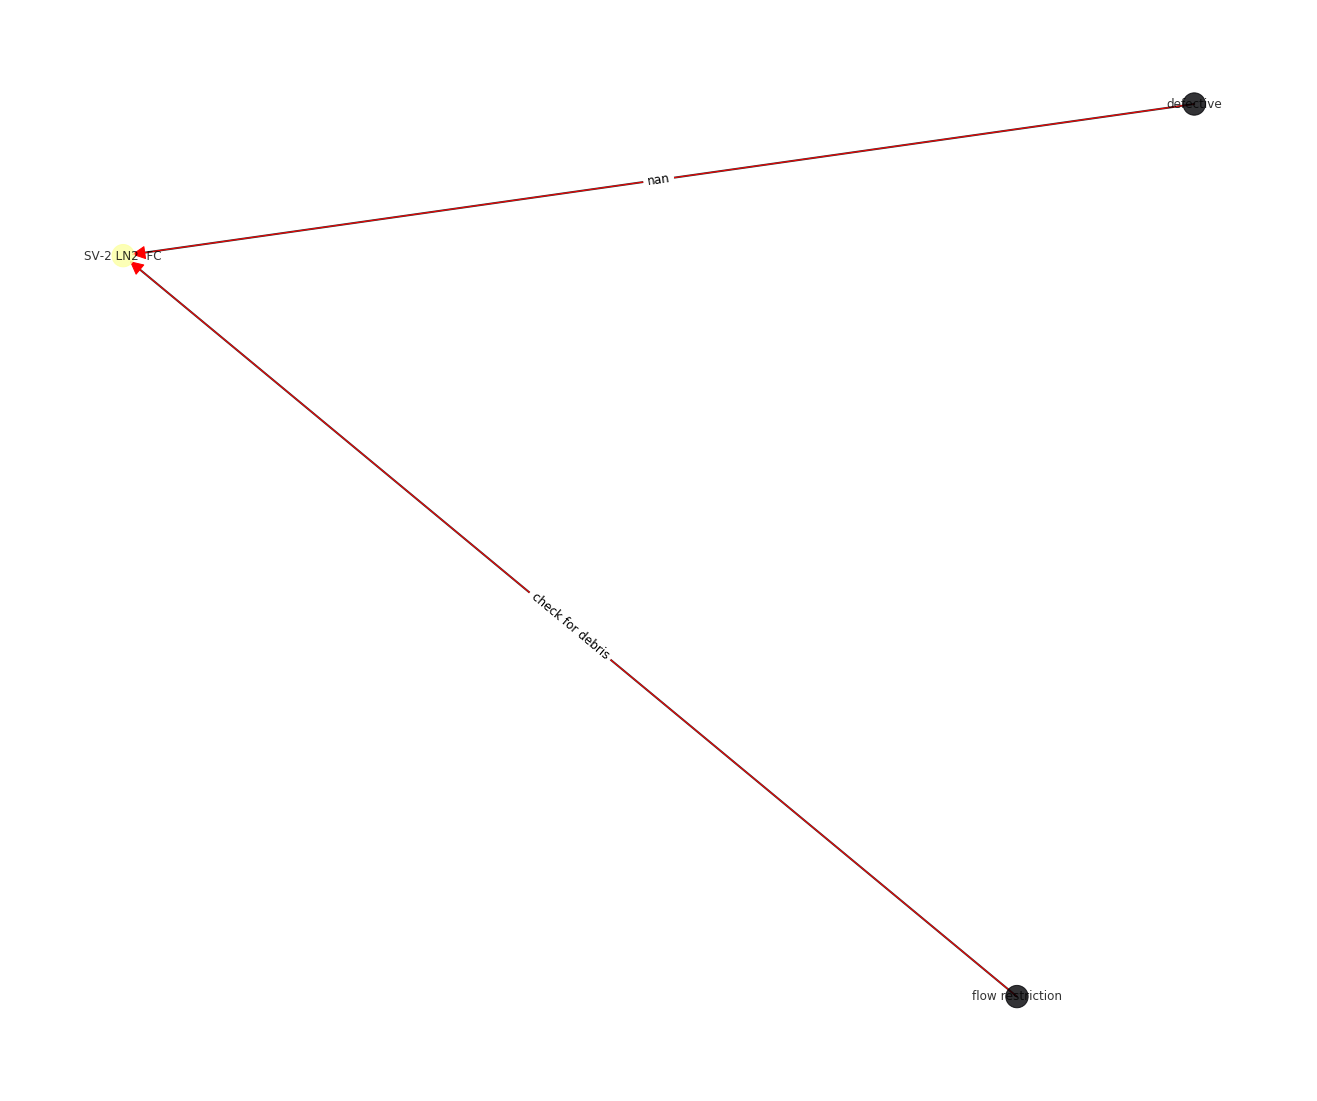

In [104]:
global view
top='SV-2 LN2  FC'
view='top level'
top_level(top)

## BFS

['SV-2 LN2  FC', 'flow restriction', 'defective', 'excessive bend', 'debris', 'Component EOL', 'MFR Error']
[('flow restriction', 'excessive bend'), ('flow restriction', 'debris'), ('defective', 'Component EOL'), ('defective', 'MFR Error'), ('SV-2 LN2  FC', 'flow restriction'), ('SV-2 LN2  FC', 'defective')]
dict_keys([('flow restriction', 'excessive bend'), ('flow restriction', 'debris'), ('defective', 'Component EOL'), ('defective', 'MFR Error'), ('SV-2 LN2  FC', 'flow restriction'), ('SV-2 LN2  FC', 'defective')])
[('excessive bend', 'flow restriction'), ('debris', 'flow restriction'), ('flow restriction', 'SV-2 LN2  FC'), ('defective', 'SV-2 LN2  FC'), ('Component EOL', 'defective'), ('MFR Error', 'defective')]
dict_keys([('excessive bend', 'flow restriction'), ('debris', 'flow restriction'), ('flow restriction', 'SV-2 LN2  FC'), ('defective', 'SV-2 LN2  FC'), ('Component EOL', 'defective'), ('MFR Error', 'defective')])


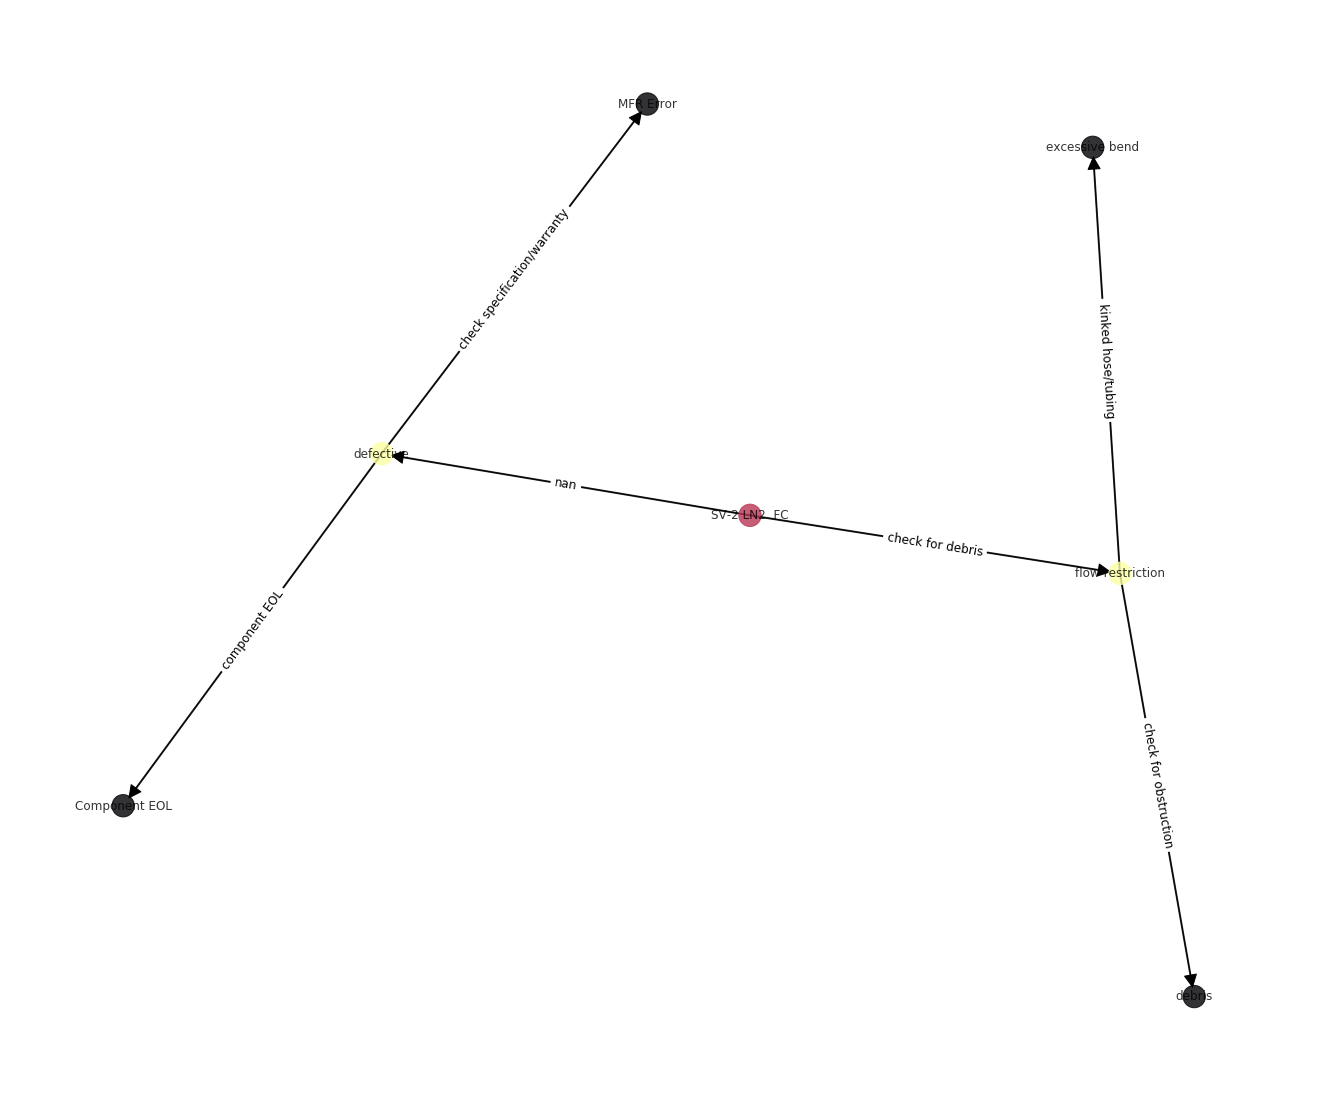

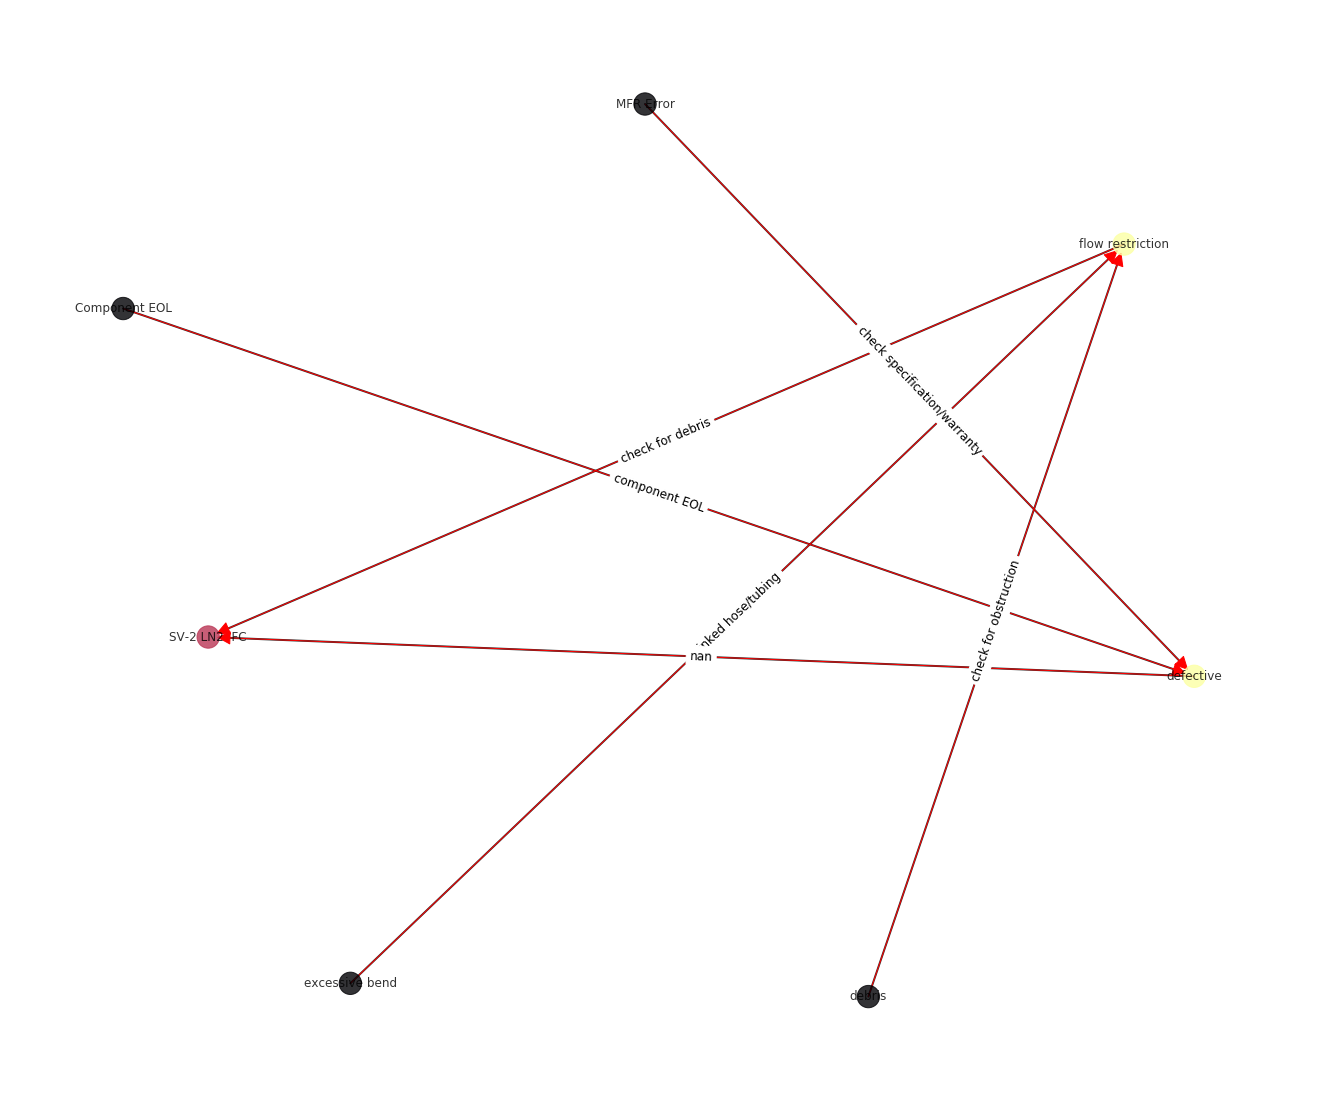

In [105]:
bfs_path=list(nx.bfs_tree(G, source='SV-2 LN2  FC', reverse=False, depth_limit=None))
print(bfs_path)
view='BFS-FWD'
plot_subgraph(bfs_path)

## BFS (root cause trace back)

[('F4 SP OVR Limit', 'operator error'), ('TCU Failed Heating', 'TS-1 OVR TEMP'), ('TCU Failed Heating', 'F4 Output 1A FO'), ('TCU Failed Cooling', 'Incorrect F4 Profile'), ('TS-1 OVR TEMP', 'F4 SP OVR Limit'), ('TCU', 'TCU Failed Heating'), ('TCU', 'TCU Failed Cooling'), ('F4 Output 1A FO', 'Incorrect F4 Profile'), ('Incorrect F4 Profile', 'operator error')]
dict_keys([('F4 SP OVR Limit', 'operator error'), ('TCU Failed Heating', 'TS-1 OVR TEMP'), ('TCU Failed Heating', 'F4 Output 1A FO'), ('TCU Failed Cooling', 'Incorrect F4 Profile'), ('TS-1 OVR TEMP', 'F4 SP OVR Limit'), ('TCU', 'TCU Failed Heating'), ('TCU', 'TCU Failed Cooling'), ('F4 Output 1A FO', 'Incorrect F4 Profile'), ('Incorrect F4 Profile', 'operator error')])
[('F4 SP OVR Limit', 'TS-1 OVR TEMP'), ('TCU Failed Heating', 'TCU'), ('operator error', 'F4 SP OVR Limit'), ('operator error', 'Incorrect F4 Profile'), ('TCU Failed Cooling', 'TCU'), ('TS-1 OVR TEMP', 'TCU Failed Heating'), ('F4 Output 1A FO', 'TCU Failed Heating'),

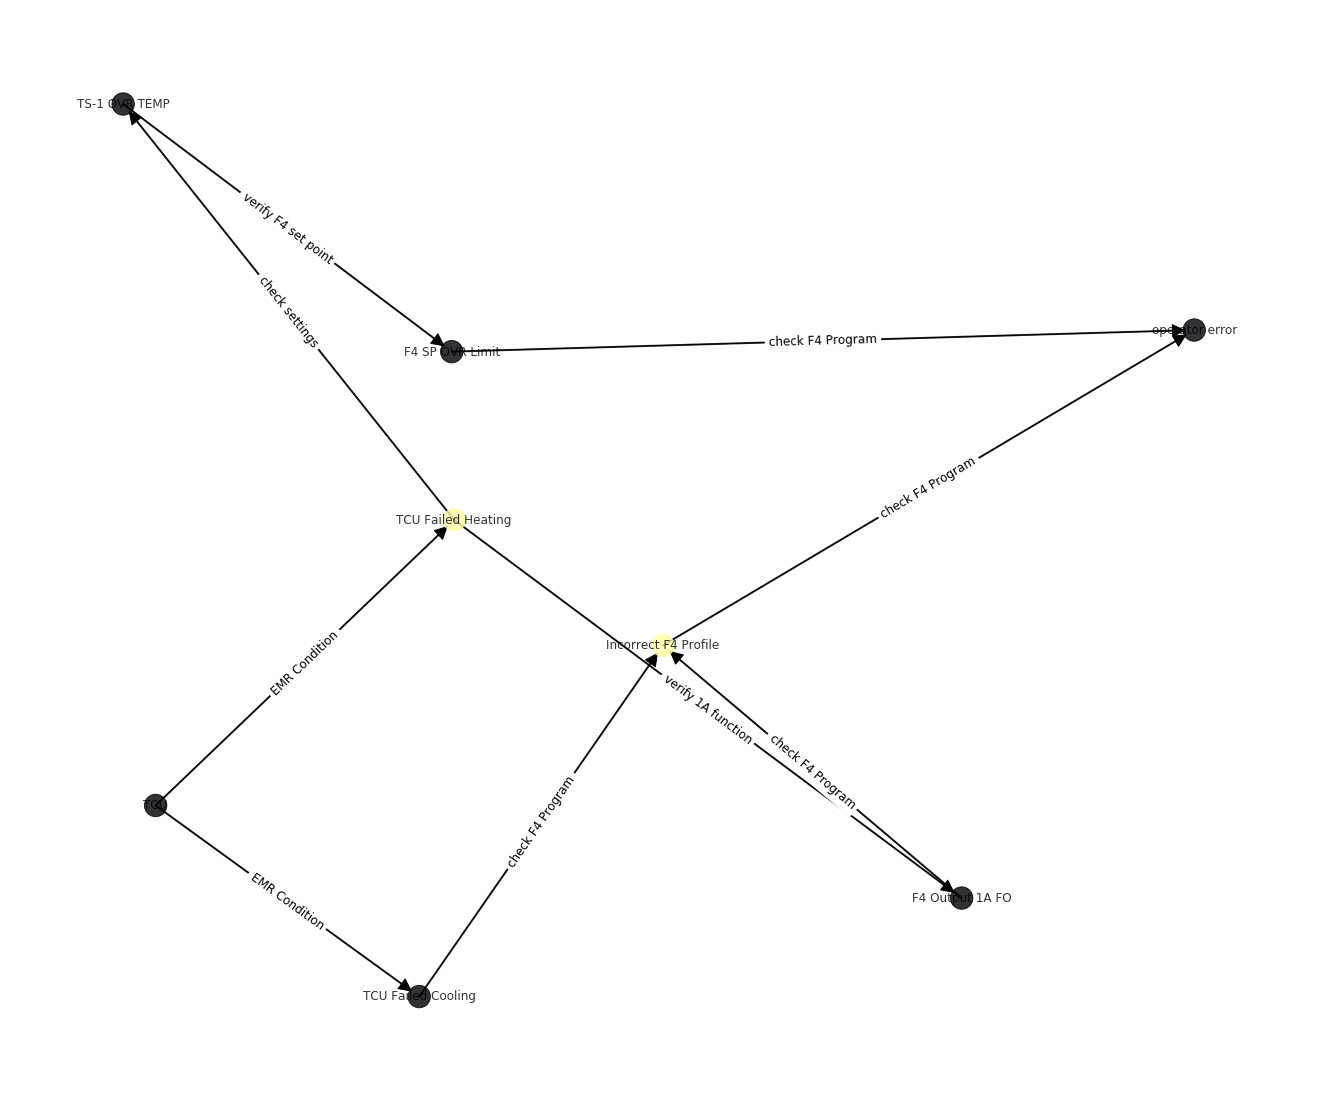

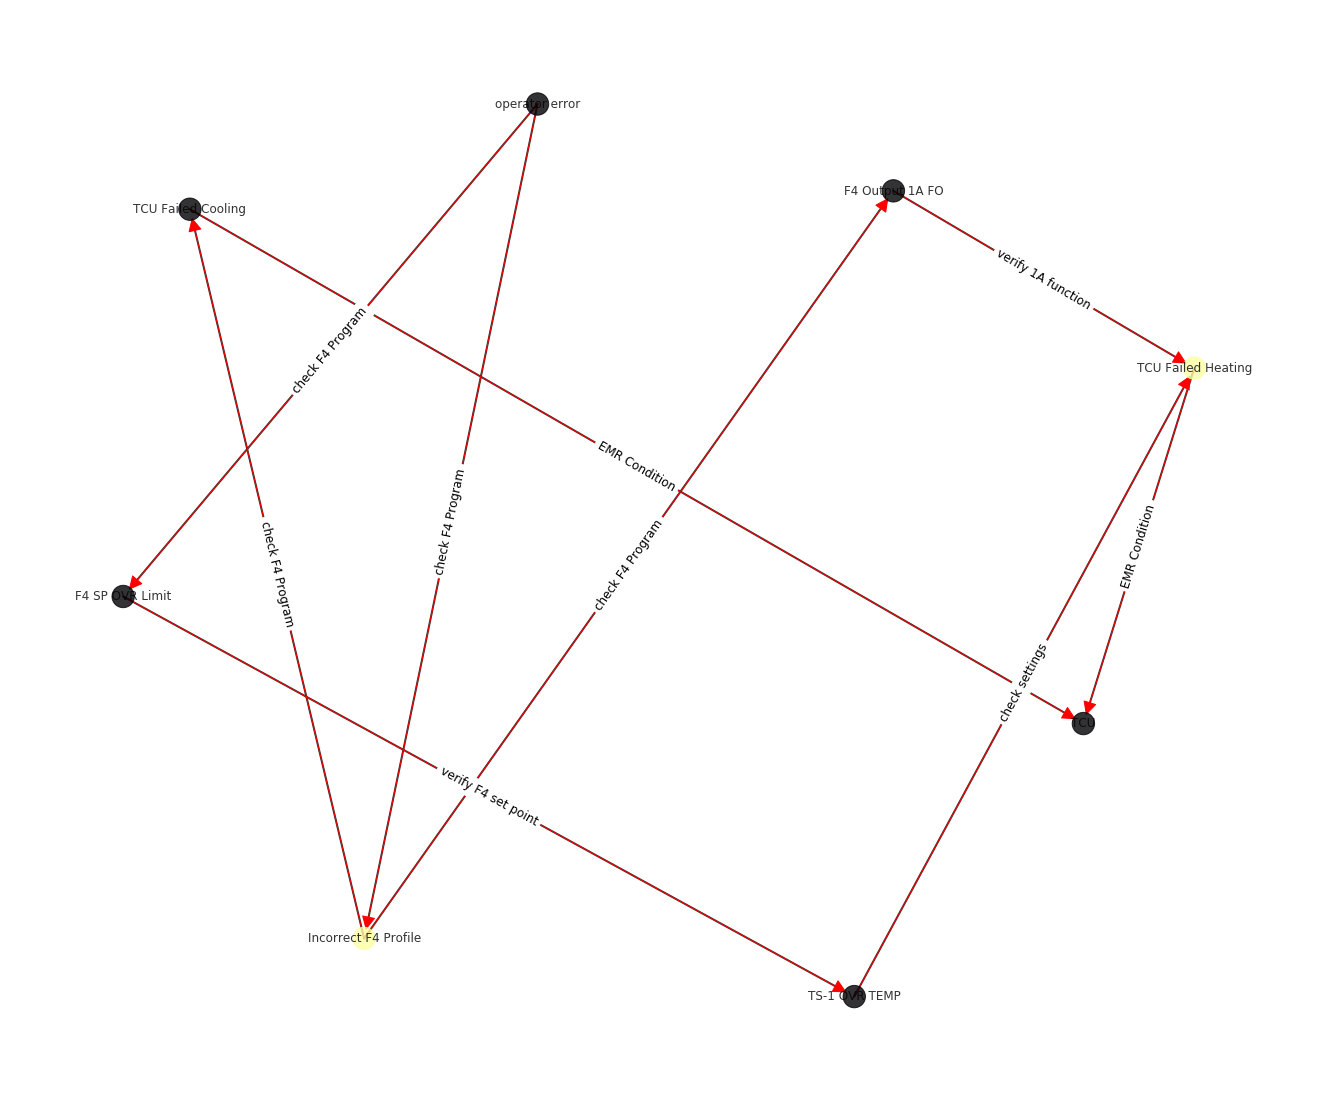

In [106]:
rc_trace=list(nx.bfs_tree(G, source='operator error', reverse=True, depth_limit=None))
view='BFS-REV'
plot_subgraph(rc_trace)

## RCA Path

[['TCU Failed Heating', 'HTR Fuse/Breaker Trip', 'HTR short', 'Component EOL'], ['TCU Failed Heating', 'HTR Fuse/Breaker Trip', 'HTR short', 'loose htr element', 'defective', 'Component EOL'], ['TCU Failed Heating', 'HTR Fuse/Breaker Trip', 'HTR short', 'loose htr element', 'TCU Vibration', 'ice on blower', 'defrost fail', 'defrost timer relay fail', 'defective', 'Component EOL'], ['TCU Failed Heating', 'F4 Output 1B FO', 'loose circuit board', 'TCU Vibration', 'ice on blower', 'defrost fail', 'defrost timer relay fail', 'defective', 'Component EOL'], ['TCU Failed Heating', 'F4 Output 1B FO', 'defective', 'Component EOL'], ['TCU Failed Heating', 'SSR-1 Fail Open', 'defective', 'Component EOL'], ['TCU Failed Heating', 'SSR-2 Fail Open', 'defective', 'Component EOL'], ['TCU Failed Heating', 'F4 Output 1A FO', 'loose circuit board', 'TCU Vibration', 'ice on blower', 'defrost fail', 'defrost timer relay fail', 'defective', 'Component EOL']] 

['TCU Failed Heating', 'HTR Fuse/Breaker Trip',

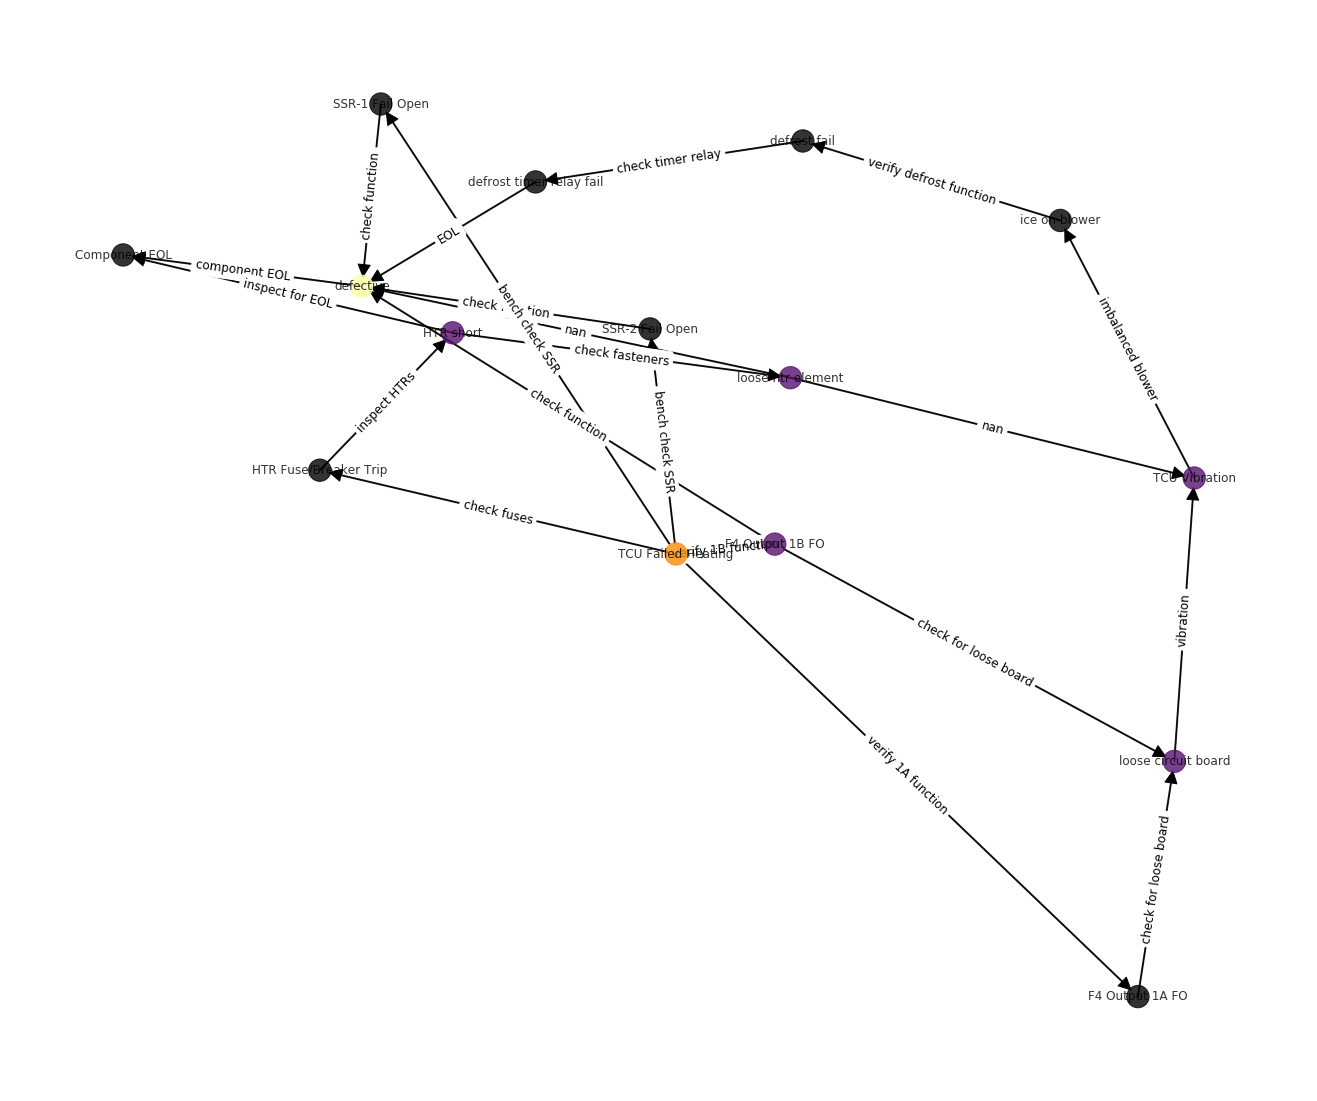

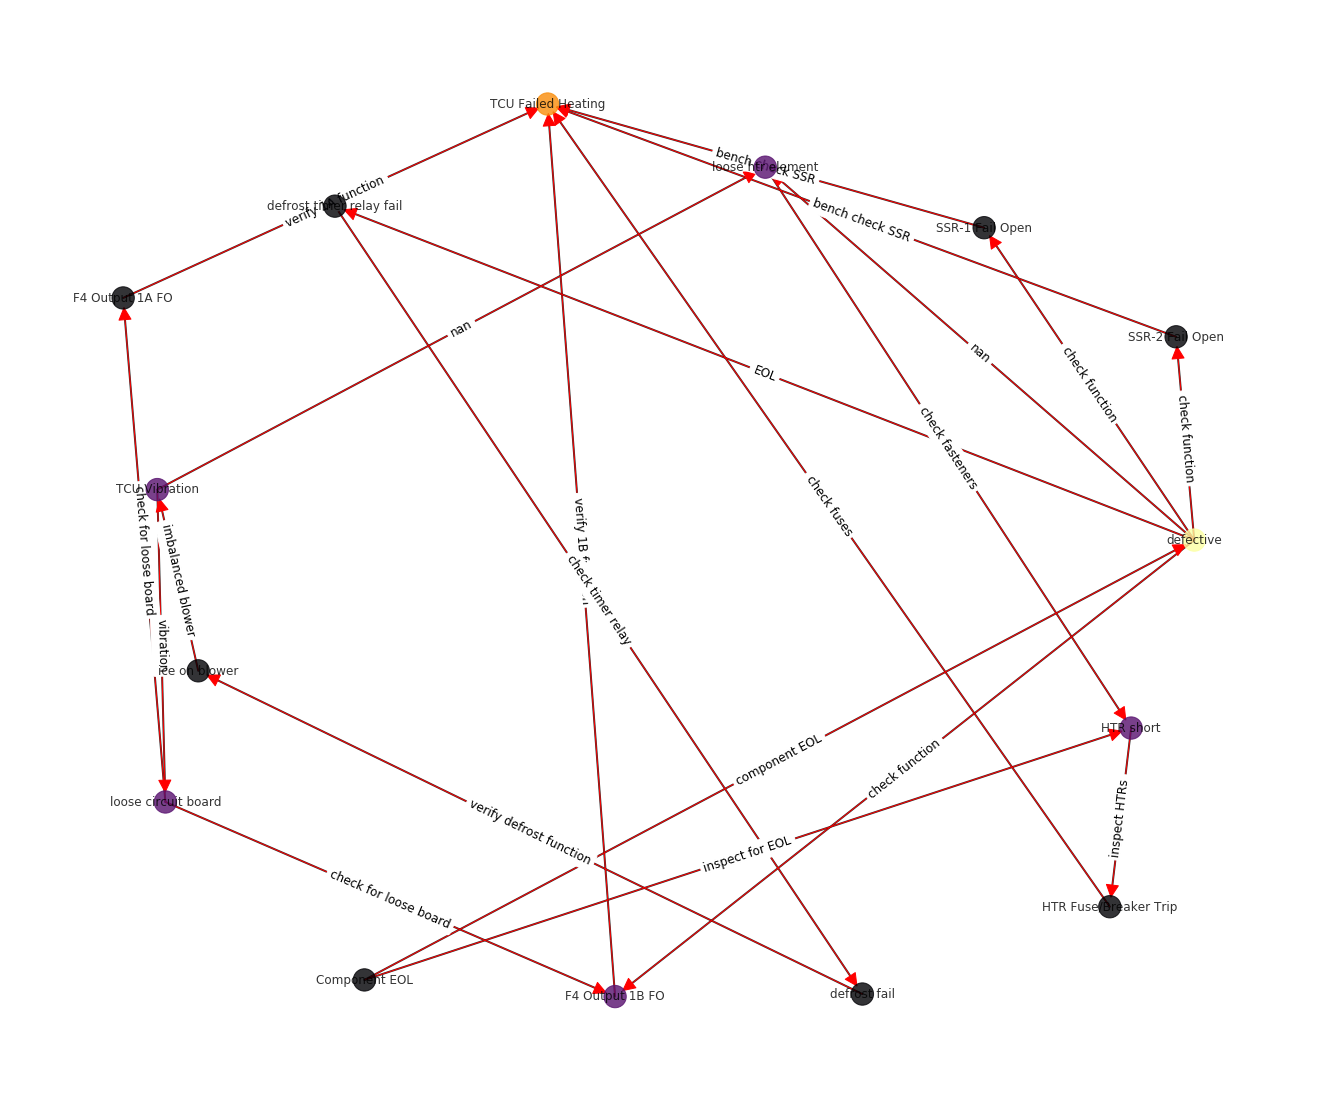

In [107]:
path_start='TCU Failed Heating'
path_stop='Component EOL'
view=path_stop
rca_path(path_start, path_stop)

# Algorithms

## Metrics

In [108]:
G.order()

84

In [109]:
G.out_degree(list([G.successors('TCU Failed Heating')]))

OutDegreeView({})

In [110]:
top_item=['TCU Failed Cooling', 'TCU Failed Heating']
for i in top_item:
    print(i,'\n')
    [print(x,':',G.out_degree(x)) for x in sorted(list(G.successors(i)))]
    print('\n')

TCU Failed Cooling 

F4 Output 1B FC : 2
Incorrect F4 Profile : 2
No LN2 Source : 2
SV-1 LN2  FC : 1
SV-2 LN2  FC : 2


TCU Failed Heating 

F4 Output 1A FO : 2
F4 Output 1B FO : 2
HTR Fuse/Breaker Trip : 2
SSR-1 Fail Open : 1
SSR-2 Fail Open : 1
SV-2 LN2  FO : 1
SW2 Fail Open : 0
TS-1 OVR TEMP : 4




## Attracting Components (extreme rc)

In [111]:
list(nx.attracting_components(G=G))

[{'Component EOL'},
 {'MFR Error'},
 {'bad bearings'},
 {'binding in blower section'},
 {'Incorrect controller configuration'},
 {'incorrect t/c input'},
 {'incorrect timer settings'},
 {'defrost limit ctrl fail'},
 {'defective belt'},
 {'no training'},
 {'procedure not followed'},
 {'controller reset'},
 {'wrong t/c type'},
 {'loose t/c connect'},
 {'excessive bend'},
 {'debris'},
 {'bad fuse'},
 {'unit 120VAC fuse/breaker trip'},
 {'XFMR  source fuses/breaker'},
 {'facility 480VAC source fail'},
 {'unit 480VAC fuse/breaker trip'},
 {'incorrect unit pwr cable'},
 {'Low LN2 Pressure'},
 {'Internal LN2 leak'},
 {'External LN2 leak'},
 {'fail close'},
 {'Flow Restriction (kinked hose)'},
 {'SW2 Fail Open'},
 {'No Communication'},
 {'Unit PM'},
 {'component upgrade'},
 {'PWR cable 30A to 60A '},
 {'PWR cable 60A to 30A '},
 {'blower motor bearings'},
 {'drive belt'},
 {'Bad cable'},
 {'Controller RS-485 fail'},
 {'incorrect RS-485 settings'}]

## Other

In [ ]:
y=nx.restricted_view(G, ['TCU'],[('blower motor no start', 'M1-AC fail open'), ('M1-AC fail open', 'defective')])

plot_subgraph(y)

In [112]:
nx.single_source_shortest_path(G, source='TS-1 OVR TEMP');

In [113]:
ss=list(nx.single_target_shortest_path_length(G, target='operator error', cutoff=None));

In [114]:
list(G.successors('TCU Failed Heating'));

In [115]:
list(G.predecessors('loose circuit board'))

['F4 Output 1A FO', 'F4 Output 1B FC', 'F4 Output 1B FO']

In [116]:
attrs = {'TCU': {'Class': 'Temperature Control Unit'}, 'Pump': {'Class': 'Hydrualic'}}

In [117]:
nx.set_node_attributes(G,attrs)

In [118]:
equip_class=nx.get_node_attributes(G,'Class')

In [119]:
equip_class['TCU']

'Temperature Control Unit'

In [120]:
G.node['TCU']['Class']

'Temperature Control Unit'

In [ ]:
dd=nx.get_edge_attributes(G,'Verify')
dd.keys()